In [1]:
!pip install sealion

# TSF internship task 1 : predicting students marks 



### Step 1: Processing the data and assigning it to proper variables

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import csv 

xvalues = []
yvalues = []
with open("/content/gdrive/MyDrive/TSF tasks/datasets/student_scores.csv","r+") as file:
    reader = csv.reader(file, delimiter = ',')
    for i in reader:
        xvalues.append(i[0])
        yvalues.append(i[1])

# making training dataframe and converting x_train to 2-D array whereas y_train is 1-D array
import numpy as np
print(xvalues)
x_train = np.array(xvalues[1:], dtype=np.float32);
x_train = x_train.reshape(-1, 1)   #converts 1-D to 2-D array

y_train = np.array(yvalues[1:], dtype=np.float32);


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Hours', '2.5', '5.1', '3.2', '8.5', '3.5', '1.5', '9.2', '5.5', '8.3', '2.7', '7.7', '5.9', '4.5', '3.3', '1.1', '8.9', '2.5', '1.9', '6.1', '7.4', '2.7', '4.8', '3.8', '6.9', '7.8']


#### Initializing and training linear regression object. 

the way Linear Regression works is by using a closed-form normal equation or an iterative optimization algorithm called gradient descent. The former is usually much faster, so SeaLion uses it here. 

In [3]:

import sealion as sl 
from sealion.regression import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=4)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#### Visualize the predictions

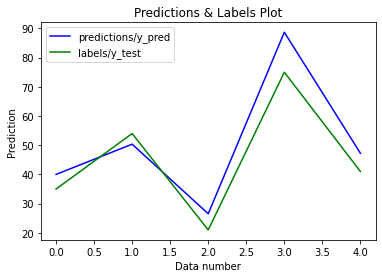

In [7]:
#Let's try to visualize it now.
y_pred = lin_reg.predict(x_test) # get the predictions
lin_reg.visualize_evaluation(y_pred, y_test)

# here the data number is the hour of study a student does, and the prediction (y-axis) is the marks he got/will get.  

#### Testing with custom data

In [5]:
hrs = [[9.25]]
predict = lin_reg.predict(hrs)
print("No. of Hours = {}".format(hrs))
print("Predicted Score = {}".format(predict[0]))

No. of Hours = [[9.25]]
Predicted Score = 96.45561671257019


#### Evaluating the model using the r^2 value.(usually from 0 - 1. More is better!)

In [6]:

r_squared = lin_reg.evaluate(x_test, y_test)
print(r_squared)

0.8235379457473755
